In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,False,True,True,False,False,True,False,False
1334,18,31.920,0,2205.98080,True,False,True,False,True,False,False,False
1335,18,36.850,0,1629.83350,True,False,True,False,False,False,True,False
1336,21,25.800,0,2007.94500,True,False,True,False,False,False,False,True


In [ ]:
insurance_one_hot = insurance_one_hot.convert_dtypes()  # Ensures proper dtype detection

# Convert only boolean columns
for col in insurance_one_hot.select_dtypes(include='boolean'):
    insurance_one_hot[col] = insurance_one_hot[col].astype(int)

insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.924,1,0,0,1,0,0,0,1
1,18,33.77,1,1725.5523,0,1,1,0,0,0,1,0
2,28,33.0,3,4449.462,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.88,0,3866.8552,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.97,3,10600.5483,0,1,1,0,0,1,0,0
1334,18,31.92,0,2205.9808,1,0,1,0,1,0,0,0
1335,18,36.85,0,1629.8335,1,0,1,0,0,0,1,0
1336,21,25.8,0,2007.945,1,0,1,0,0,0,0,1


In [ ]:
X = insurance_one_hot.drop("charges",axis=1)
Y = insurance_one_hot["charges"]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   Int64  
 1   bmi               1338 non-null   Float64
 2   children          1338 non-null   Int64  
 3   sex_female        1338 non-null   int64  
 4   sex_male          1338 non-null   int64  
 5   smoker_no         1338 non-null   int64  
 6   smoker_yes        1338 non-null   int64  
 7   region_northeast  1338 non-null   int64  
 8   region_northwest  1338 non-null   int64  
 9   region_southeast  1338 non-null   int64  
 10  region_southwest  1338 non-null   int64  
dtypes: Float64(1), Int64(2), int64(8)
memory usage: 119.0 KB


In [ ]:
import tensorflow as tf

In [ ]:
import tf_keras as keras

In [ ]:
for col in X.select_dtypes(include=['int64']).columns:
    X[col] = X[col].astype('float64')

In [ ]:
Y

,charges
0,16884.924
1,1725.5523
2,4449.462
3,21984.47061
4,3866.8552
...,...
1333,10600.5483
1334,2205.9808
1335,1629.8335
1336,2007.945


In [ ]:
Y = Y.astype('float64')

In [ ]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1338 entries, 0 to 1337
Series name: charges
Non-Null Count  Dtype  
--------------  -----  
1338 non-null   float64
dtypes: float64(1)
memory usage: 10.6 KB


In [ ]:
X.dtypes

,0
age,float64
bmi,Float64
children,float64
sex_female,float64
sex_male,float64
smoker_no,float64
smoker_yes,float64
region_northeast,float64
region_northwest,float64
region_southeast,float64


In [ ]:
Y.dtypes

dtype('float64')

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
X_train = X_train.astype('float64')

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1070 entries, 560 to 1126
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1070 non-null   float64
 1   bmi               1070 non-null   float64
 2   children          1070 non-null   float64
 3   sex_female        1070 non-null   float64
 4   sex_male          1070 non-null   float64
 5   smoker_no         1070 non-null   float64
 6   smoker_yes        1070 non-null   float64
 7   region_northeast  1070 non-null   float64
 8   region_northwest  1070 non-null   float64
 9   region_southeast  1070 non-null   float64
 10  region_southwest  1070 non-null   float64
dtypes: float64(11)
memory usage: 100.3 KB


In [ ]:
X_test=X_test.astype('float64')

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, 764 to 846
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               268 non-null    float64
 1   bmi               268 non-null    float64
 2   children          268 non-null    float64
 3   sex_female        268 non-null    float64
 4   sex_male          268 non-null    float64
 5   smoker_no         268 non-null    float64
 6   smoker_yes        268 non-null    float64
 7   region_northeast  268 non-null    float64
 8   region_northwest  268 non-null    float64
 9   region_southeast  268 non-null    float64
 10  region_southwest  268 non-null    float64
dtypes: float64(11)
memory usage: 25.1 KB


In [ ]:
Y_train.info()

<class 'pandas.core.series.Series'>
Index: 1070 entries, 560 to 1126
Series name: charges
Non-Null Count  Dtype  
--------------  -----  
1070 non-null   float64
dtypes: float64(1)
memory usage: 16.7 KB


In [ ]:
Y_train.info()

<class 'pandas.core.series.Series'>
Index: 1070 entries, 560 to 1126
Series name: charges
Non-Null Count  Dtype  
--------------  -----  
1070 non-null   float64
dtypes: float64(1)
memory usage: 16.7 KB


In [ ]:
tf.random.set_seed(42)

insurance_model = keras.Sequential([
    keras.layers.Dense(10),
    keras.layers.Dense(1)
])

insurance_model.compile(loss=keras.losses.mae,
                        optimizer = keras.optimizers.SGD(),
                        metrics = ["mae"])
insurance_model.fit(tf.expand_dims(X_train,axis=-1),Y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 3ms/step - loss: 13215.5605 - mae: 13215.5605
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 12288.8193 - mae: 12288.8193
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12171.4932 - mae: 12171.4932
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12096.0459 - mae: 12096.0459
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 11980.5547 - mae: 11980.5547
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 11791.4385 - mae: 11791.4385
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 11462.6660 - mae: 11462.6660
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 10947.8232 - mae: 10947.8232
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 10333.0752 - mae: 10333.0752
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 9682.475

In [ ]:
insurance_model.evaluate(X_test,Y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8925.7627 - mae: 8925.7627


[8925.7626953125, 8925.7626953125]

In [ ]:
Y_train.median(),Y_train.mean()

(9575.4421, 13346.089736364485)

Yuck thats so bad performance from the model

In [ ]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model_2.compile(loss= tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.SGD(),
                          metrics=["mae"])
insurance_model_2.fit(tf.expand_dims(X_train,axis=-1),Y_train,epochs=100,verbose=1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 13020.9932 - mae: 13020.9932
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 11887.4072 - mae: 11887.4072
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11260.5938 - mae: 11260.5938
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10873.7598 - mae: 10873.7598
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9757.3789 - mae: 9757.3789
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9958.9062 - mae: 9958.9062
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9522.3066 - mae: 9522.3066
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9706.0000 - mae: 9706.0000
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9679.2949 - mae: 9679.2949
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9518.4688 - mae: 9518.4688
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9453.6924 - mae: 9453.6924
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [ ]:
insurance_model_2.evaluate(X_test,Y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 12893.1309 - mae: 12893.1309


[12434.1904296875, 12434.1904296875]

YUck again so bad performance but boy this time we aint moving on this time we gonna fix u

In [ ]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model_2.compile(loss= tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics=["mae"])
insurance_model_2.fit(tf.expand_dims(X_train,axis=-1),Y_train,epochs=100,verbose=1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 13296.8789 - mae: 13296.8789
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13279.7979 - mae: 13279.7979
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13248.2666 - mae: 13248.2666
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13187.8125 - mae: 13187.8125
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13082.4678 - mae: 13082.4678
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12917.8975 - mae: 12917.8975
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12692.7559 - mae: 12692.7559
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12432.5439 - mae: 12432.5439
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12194.2080 - mae: 12194.2080
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12076.4941 - mae: 12076.4941
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12043.6650 - mae: 12043.6650
Epoch 12/100
34/34 ━━━━━━━━━━

In [ ]:
insurance_model_2.evaluate(X_test,Y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8771.0176 - mae: 8771.0176


[8619.9765625, 8619.9765625]

In [ ]:
insurance_model.evaluate(X_test,Y_test)

9/9 [==============================] - 0s 5ms/step - loss: 8925.7627 - mae: 8925.7627


[8925.7626953125, 8925.7626953125]

In [31]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics=["mae"])
history = insurance_model_3.fit(tf.expand_dims(X_train,axis=-1),Y_train,epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 13293.9102 - mae: 13293.9102
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13273.1357 - mae: 13273.1357
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13235.6309 - mae: 13235.6309
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13166.4785 - mae: 13166.4785
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13049.4609 - mae: 13049.4609
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12872.0508 - mae: 12872.0508
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12638.7295 - mae: 12638.7295
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12378.8633 - mae: 12378.8633
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12161.5947 - mae: 12161.5947
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12068.9844 - mae: 12068.9844
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12041.5732 - mae: 12041.5732
Epoch 12/200
34/34 ━━━━━━━━━━

In [32]:
insurance_model_3.evaluate(X_test,Y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 8771.0264 - mae: 8771.0264


[8620.005859375, 8620.005859375]

In [33]:
insurance_model.evaluate(X_test,Y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8925.7627 - mae: 8925.7627


[8925.7626953125, 8925.7626953125]

In [34]:
insurance_model_2.evaluate(X_test,Y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 8771.0176 - mae: 8771.0176


[8619.9765625, 8619.9765625]

Text(0.5, 0, 'epochs')

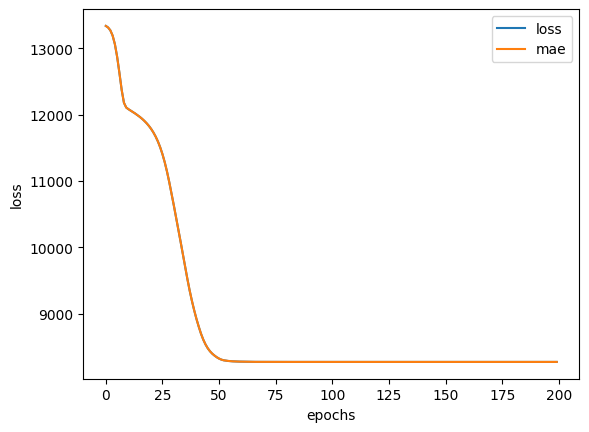

In [35]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [36]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.9,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18.0,33.77,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28.0,33.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33.0,22.705,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32.0,28.88,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50.0,30.97,3.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18.0,31.92,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18.0,36.85,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21.0,25.8,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


Here we will be doing some heavy work for the neural network namely normalisation

According to my research it has come to my obsevtion that neural networks work well when the features are similar or normally distributed

here we will be doing some of the work for the second time in order to avoid ambiguity of the dataframe

In [37]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [38]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder



In [39]:
ct= make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]), #this will turn all the values in 0 and 1
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

X=insurance.drop("charges",axis=1) #features
Y=insurance["charges"] #labels

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

Checking the changed data

In [40]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [41]:
X_train.shape,X_train_normal.shape

((1070, 6), (1070, 11))

In [48]:
#Building the neural network in the same normalised data
tf.random.set_seed(42)

insurance_model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(1)
])
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                          metrics= ["mae"])
insurance_model_4.fit(tf.expand_dims(X_train_normal,axis=-1),Y_train,epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 13280.1748 - mae: 13280.1748
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12720.3145 - mae: 12720.3145
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10096.5664 - mae: 10096.5664
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8509.2266 - mae: 8509.2266
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8385.3506 - mae: 8385.3506
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8309.9531 - mae: 8309.9531
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8266.6338 - mae: 8266.6338
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8240.1777 - mae: 8240.1777
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8227.2666 - mae: 8227.2666
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8222.0039 - mae: 8222.0039
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8219.3906 - mae: 8219.3906
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4m

In [52]:
#Building the neural network in the same normalised data
tf.random.set_seed(42)

insurance_model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
                          metrics= ["mae"])
insurance_model_4.fit(tf.expand_dims(X_train_normal,axis=-1),Y_train,epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 11125.5742 - mae: 11125.5742
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8265.2002 - mae: 8265.2002
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8254.5762 - mae: 8254.5762
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8270.8545 - mae: 8270.8545
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8262.9365 - mae: 8262.9365
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8263.6865 - mae: 8263.6865
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8267.0674 - mae: 8267.0674
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8271.4697 - mae: 8271.4697
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8281.7617 - mae: 8281.7617
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8284.3096 - mae: 8284.3096
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8281.8066 - mae: 8281.8066
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/st

In [53]:
insurance_model_4.evaluate(X_test_normal,Y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8778.5234 - mae: 8778.5234


[8583.5068359375, 8583.5068359375]